# Rayleigh-Plesset Equation: Solutions

# Some SymPy and SciPy Approaches

In [1]:
import math
import numpy as np
from scipy.misc import derivative
from scipy.optimize import fsolve
#from sympy import Function, Derivative, Symbol, dsolve
#from sympy.abc import t #t is the independent variable
#R = Function("R")(t) #R is a function of t (time)
#t = Symbol('t')
rho = 1060 #density of the fluid surrounding the bubble in kg/m^3
p_0 = 3333.05968538 #hydrostatic liquid pressure outside the bubble in Pa
sig = 0.07286 #surface tension of liquid in N/m
R_0 = 0.0000022 #equilibrium radius of the bubble in m
p_v = 2338.8 #vapour pressure within the bubble in Pa
kap = 1.07 #dimensionless polytropic index
def p(t): #10 kHz sound field of pressure amplitude 2.7 bar
    return 270000*np.sin(2*math.pi*10000*t)


#SymPy approach

#Rayleigh-Plesset Equation
RP_Eq = R(t)*Derivative(R, t, t) + 3*(Derivative(R, t))**2/2 - 1/rho*((p_0 + 2*sig/R_0 - p_v)*(R_0/R(t))**(3*kap) + p_v - 2*sig/R(t) - p_0 - p(t))

#Solve
dsolve(R(t)*Derivative(R, t, t) + 3*(Derivative(R, t))**2/2 - 1/rho*((p_0 + 2*sig/R_0 - p_v)*(R_0/R(t))**(3*kap) + p_v - 2*sig/R(t) - p_0 - p(t)), R(t), hint='1st_exact')


#SciPy approach

#Rayleigh-Plesset Equation
def RP(t):
    return R(t)*derivative(R(t), t, 1e-3, 2) + 3*derivative(R(t), t, 1e-3, 1)**2/2 - 1/rho*((p_0 + 2*sig/R_0 - p_v)*(R_0/R(t))**(3*kap) + p_v - 2*sig/R(t) - p_0 - p(t))

#Solve
print(RP(0.0002)) #test if function works
print(fsolve(RP(t), 0.001))

NameError: name 'R' is not defined

# Odeint Approach

/usr/local/lib/python3.5/dist-packages/scipy/integrate/odepack.py:218: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


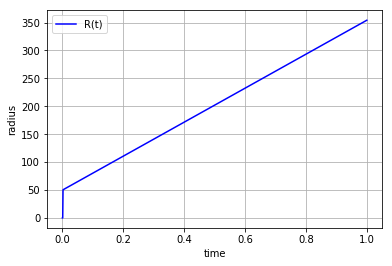

In [21]:
# Solve using odeint
import math
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
rho = 1060 #density of the fluid surrounding the bubble in kg/m^3
p_0 = 3333.05968538 #hydrostatic liquid pressure outside the bubble in Pa
sig = 0.07286 #surface tension of liquid in N/m
R_0 = 0.002 #equilibrium radius of the bubble in m
p_v = 2338.8 #vapour pressure within the bubble in Pa
kap = 1.07 #dimensionless polytropic index
def p(t): #10 kHz sound field of pressure amplitude 2.7 bar
    return 270000*np.sin(2*math.pi*10000*t)

def Rayleigh(y, t):
    R, Q = y
    dydt = [Q, (1.0/rho*((p_0 + 2.0*sig/R_0 - p_v)*(R_0/R)**(3.0*kap) + p_v - 2.0*sig/R - p_0 - p(t)) - 3.0*Q**2.0/2.0)/R]
    return dydt

y0 = [R_0, 0.0]
t = np.linspace(0, 1, 1000)

sol = odeint(Rayleigh, y0, t)
plt.plot(t, sol[:, 0], 'b', label='R(t)')
plt.legend(loc='best')
plt.xlabel('time')
plt.ylabel('radius')
plt.grid()
plt.show()


# Solving each side and finding intersection curve

In [3]:
#Solve each side and then equate to find intersection point at each t

import math
from sympy import Function, dsolve, Eq, Derivative, symbols, expand
from sympy.abc import t
from scipy.optimize import fsolve

#Parameters
R = Function('R')
rho = 1060 #density of the fluid surrounding the bubble in kg/m^3
p_0 = 3333.05968538 #hydrostatic liquid pressure outside the bubble in Pa
sig = 0.07286 #surface tension of liquid in N/m
R_0 = 0.0022 #equilibrium radius of the bubble in m
p_v = 2338.8 #vapour pressure within the bubble in Pa
kap = 1.07 #dimensionless polytropic index
def p(t): #10 kHz sound field of pressure amplitude 2.7 bar
    return 270000.0*math.sin(2.0*math.pi*10000.0*t)

#Plug in the values for the parameters and expand the Rayleigh-Plesset Equation
print(expand(R(t)**(3*kap+1)*Derivative(R(t), t, 2) + (3.0/2)*R(t)**(3*kap)*Derivative(R(t), t, 1)**2 - 1/rho*((p_0 + 2*sig/R_0 - p_v)*R_0**(3*kap) + R(t)**(3*kap)*p_v - 2*R(t)**(3*kap-1)*sig - R(t)**(3*kap)*p_0) - R(t)**(3*kap)*6.94708984660307e-10, R(t)))

#LHS of Rayleigh-Plesset Equation
print(dsolve(R(t)**(3*kap+1)*Derivative(R(t), t, 2) + 3.0/2*R(t)**(3*kap)*Derivative(R(t), t, 1)**2, R(t)))

#RHS of Rayleigh-Plesset Equation, where y = R(t)
def RHS(y):
    return 0.000137471698113208*y**2.21 + 0.937980835264151*y**3.21 - y**(3*kap)*6.94708984660307e-10
print(fsolve(RHS, 0.0002))

0.000137471698113208*R(t)**2.21 + 1.5*R(t)**3.21*Derivative(R(t), t)**2 + 0.937980834569442*R(t)**3.21 + R(t)**4.21*Derivative(R(t), t, t) - 2.94699904438673e-9
Eq(R(t), 1.44269990590721*(C1 + C2*t)**0.4)
[  1.80774283e-76]


/usr/local/lib/python3.5/dist-packages/scipy/optimize/minpack.py:161: RuntimeWarning: The number of calls to function has reached maxfev = 400.
  warnings.warn(msg, RuntimeWarning)


# Mathematica Approach

In [7]:
Clear[R, R0, Rho, P0, Sigma, Pv, Eta, P(t), Kappa]

R0 = 0.002

Rho = 1000

P0 = 101325

Sigma = 0.07286

Pv = 2338.8

Eta = 0.001002

def P(t): 
    return 270000*np.sin(2*math.pi*10000*t)

Kappa = 1.4

NDSolve[{R[t]*R''[t] + (3 (R'[t])^2)/2 == 1/\[Rho]*((P0 + (2*\[Sigma])/R0 - Pv)*(R0/R[t])^(3*\[Kappa]) + 
                           Pv - (2*\[Sigma])/R[t] - (4*\[Eta]*R'[t])/R[t] - P0 - P[t]), 
  R[0] == R0, R'[0] == 0}, R, {t, 0, 0.001}]
Plot[Evaluate[R[t] /. %], {t, 0, 0.001}, 
 AxesLabel -> {"Time (s)", "Bubble radius R (m)"}]

SyntaxError: EOL while scanning string literal (<ipython-input-7-3edead085d20>, line 20)

# MATLAB Approach (from Lars Hoff script)

In [15]:
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

rho = 1060 #density of the fluid surrounding the bubble in kg/m^3
p_0 = 3333.05968538 #hydrostatic liquid pressure outside the bubble in Pa
sig = 0.07286 #surface tension of liquid in N/m
R_0 = 0.0000022 #equilibrium radius of the bubble in m
p_v = 2338.8 #vapour pressure within the bubble in Pa
kap = 1.07 #dimensionless polytropic index

def SurfacePressure(x,dx,gs,ns,nL,kappa):
    # Pressure at the bubble surface
    #
    #   x : Radial strain
    #  dx = dx/dt
    #  gs : Normalized shell shear modulus
    #  ns : Normalized shell shear viscosity
    #  nL : Normalized liquid viscosity
    #  kappa: Polytropic exponent
    #  qL : Pressure at bubble surface
    #  q1 = dqL/dx
    #  q2 = dqL/ddx
    #
    #  Calculate pressure at bubble surface
    #  Boundary condition for ODE giving bubble motion

    #--- Gas pressure ---
    qg  = (1 + x)**(-3*kappa)
    dqg = -3*kappa*(1 + x)**(-3*kappa - 1)

    #--- Shell pressure ---
    #--- Exponential shell model ---
    x0 = 1.0/8
    x1 = 1.0/4
    eg = math.exp(-x/x0)  # Stiffness
    en = math.exp(-x/x1)  # Viscosity

    qs   = -12*(gs*x0*(1-eg) + ns*en*dx)
    dqs1 = -12*(gs*eg - ns/x1*en*dx)
    dqs2 = -12*ns*en

    #--- Pressure at bubble wall ---
    qL = -4.0*nL*dx/(1+x) + qs + qg
    q1 =  4.0*nL*dx/(1+x)**2 + dqs1 + dqg
    q2 = -4.0*nL*1/(1+x) + dqs2

    return [qL,q1,q2]

def p(t): #10 kHz sound field of pressure amplitude 2.7 bar
    return 270000*np.sin(2.0*math.pi*10000.0*t)

def Rayleigh(t, x, dx, gs, ns, nL, kappa):
    # Simulate Rayleigh-Plesset equation for gas encapsulated in a shell
    # Normalized radial displacement, pressure and time
    #
    # t : Time
    # x : Radial strain
    # dx = dx/dt
    #
    #--- Normalized visco-elastic physical parameters ---
    # gs : Normalized shell shear modulus
    # ns : Normalized shell shear viscosity
    # nL : Normalized liquid viscosity
    # kappa : Polytropic exponent
    
    T = math.sqrt(p_0/(rho*R_0**2))*np.arange(0,t+0.01,0.5) #Normalized time T = t*w0, w0= sqrt(p0/(rho*a0^2))               
    #IS IT R_0 OR INITIAL RADIUS?
    
    qi = interp1d(T, p(T), kind='cubic') # Driving pressure

    #--- Pressure at bubble surface ---
    SP = SurfacePressure(x,dx,gs,ns,nL,kappa)
    
    #--- ODE ---
    q3  =  1.0+x
    ddx = -1.0/q3*(3.0/2*dx**2 + 1 + qi(T) - SP[0])

    return ddx

plt.plot(np.arange(0,8.01,0.5), Rayleigh(2, 100, 0.001, 30, 0.005, 54, 1.07), 'b-')
plt.show()

ValueError: x and y must have same first dimension, but have shapes (17,) and (5,)

WRITE UP EVERYTHING. WRITE A WORD DOC AND PUT EVERYTHING ON A GOOGLE DRIVE TO HAND OFF EVERYTHING I DID THIS SUMMER TO NEXT YEAR'S RESEARCH ASSISTANTS.

Increase acoustic presure until it gets non-sinusoidal.
What is an STL? 